# PROJECT FIFA 21
In the project we will be looking at the factors influencing the overall rating of players in the popular Sports videogame FIFA 21.
The question we would like to answer is:

What factors contribute to a player´s rating? 

What data will we look at?
The data for this project is an extracted from https://sofifa.com/

Explanations of the acronyms and abbreviations can be found at the links below.
1) https://gaming.stackexchange.com/questions/167318/what-do-fifa-14-position-acronyms-mean 
2) https://fifauteam.com/fifa-ultimate-team-positions-and-tactics/ 

In [1]:
#Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn
from math import sqrt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [2]:
# Ensure all pd cells are viewable.
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None) 

In [3]:
# Handle warning messages


# Get Data
Read the data into an operable dataframe.

In [4]:
# Read data into a pandas dataframe
fifa_players = pd.read_csv('C:/Users/Ish/Documents/Ironhack Bootcamp/Unit 2/Day 1/L2.01/fifa21_training.csv')

# Preview the data
fifa_players.head()


Unnamed: 0      ID           Name  Age  Nationality  \
0        1954  184383      A. Pasche   26  Switzerland   
1        2225  188044  Alan Carvalho   30     China PR   
2        1959  184431    S. Giovinco   33        Italy   
3        9815  233796       J. Evans   22        Wales   
4       10074  234799     Y. Demoncy   23       France   

                         Club   BP  Position  \
0           FC Lausanne-Sport   CM    CM CDM   
1     Beijing Sinobo Guoan FC   ST  ST LW LM   
2                    Al Hilal  CAM    CAM CF   
3                Swansea City  CDM    CDM CM   
4  US Orléans Loiret Football  CDM    CDM CM   

                                Team & Contract Height  Weight   foot  Growth  \
0                 FC Lausanne-Sport 2015 ~ 2020   5'9"  161lbs  Right       1   
1  Beijing Sinobo Guoan FC Dec 31, 2020 On Loan   6'0"  159lbs  Right       0   
2                          Al Hilal 2019 ~ 2022   5'4"  134lbs  Right       0   
3                      Swansea City 2016 ~ 2021  5'10"  152lbs  Right      13   
4        US Orléans Loiret Football 2018 ~ 2021  5'11"  150lbs  Right       8   

         Joined Loan Date End  Value  Wage Release Clause  \
0   Jul 1, 2015           NaN  €525K   €4K          €801K   
1  Jan 16, 2015  Dec 31, 2020  €8.5M  €23K             €0   
2  Jan 31, 2019           NaN    €9M  €49K         €15.3M   
3   Jul 1, 2016           NaN  €275K   €4K          €694K   
4   Jul 1, 2018           NaN  €725K   €2K          €1.4M   

               Contract  Attacking  Crossing  Finishing  Heading Accuracy  \
0           2015 ~ 2020        258        54         47                43   
1  Dec 31, 2020 On Loan        365        66         79                76   
2           2019 ~ 2022        336        73         76                34   
3           2016 ~ 2021        242        44         42                58   
4           2018 ~ 2021        249        49         37                61   

   Short Passing  Volleys  Skill  Dribbling  Curve  FK Accuracy  Long Passing  \
0             70     44.0    286         61   44.0           55            63   
1             68     76.0    375         83   78.0           72            63   
2             78     75.0    424         85   89.0           91            74   
3             62     36.0    259         54   41.0           46            57   
4             68     34.0    280         64   44.0           45            61   

   Ball Control  Movement  Acceleration  Sprint Speed  Agility  Reactions  \
0            63       346            64            73     61.0         66   
1            79       404            83            83     88.0         75   
2            85       424            84            76     93.0         78   
3            61       282            54            59     59.0         55   
4            66       324            66            66     61.0         62   

   Balance  Power  Shot Power  Jumping  Stamina  Strength  Long Shots  \
0     82.0    306          62     73.0       71        55          45   
1     75.0    372          74     81.0       75        74          68   
2     93.0    308          79     34.0       75        42          78   
3     55.0    277          57     60.0       64        58          38   
4     69.0    280          61     34.0       81        61          43   

   Mentality  Aggression  Interceptions  Positioning  Vision  Penalties  \
0        290          54           52.0         62.0    68.0         54   
1        313          54           33.0         78.0    72.0         76   
2        332          75           26.0         80.0    78.0         73   
3        257          61           57.0         31.0    54.0         54   
4        294          66           60.0         55.0    64.0         49   

   Composure  Defending  Marking  Standing Tackle  Sliding Tackle  \
0       54.0        148       49               56            43.0   
1       70.0         77       35               20            22.0   
2

In [5]:
# view data types
fifa_players.dtypes

Unnamed: 0            int64
ID                    int64
Name                 object
Age                   int64
Nationality          object
Club                 object
BP                   object
Position             object
Team & Contract      object
Height               object
Weight               object
foot                 object
Growth                int64
Joined               object
Loan Date End        object
Value                object
Wage                 object
Release Clause       object
Contract             object
Attacking             int64
Crossing              int64
Finishing             int64
Heading Accuracy      int64
Short Passing         int64
Volleys             float64
Skill                 int64
Dribbling             int64
Curve               float64
FK Accuracy           int64
Long Passing          int64
Ball Control          int64
Movement              int64
Acceleration          int64
Sprint Speed          int64
Agility             float64
Reactions           

In [6]:
# Define function to check NaN values.

def NaN_percenter(dataframe):
    null_df = pd.DataFrame(round(dataframe.isnull().sum()/len(dataframe),4)*100)
    null_df = null_df.reset_index()
    null_df.columns = ['feature','PercentNaNs']
    return null_df

NaNs = NaN_percenter(fifa_players)
NaNs.T

0    1     2    3            4     5    6         7    \
feature      Unnamed: 0   ID  Name  Age  Nationality  Club   BP  Position   
PercentNaNs         0.0  0.0   0.0  0.0          0.0  0.15  0.0       2.5   

                         8       9       10    11      12      13   \
feature      Team & Contract  Height  Weight  foot  Growth  Joined   
PercentNaNs              0.0     0.0     0.0   0.0     0.0    0.32   

                       14     15    16              17        18         19   \
feature      Loan Date End  Value  Wage  Release Clause  Contract  Attacking   
PercentNaNs          94.61    0.0   0.0             0.0       0.0        0.0   

                  20         21                22             23       24   \
feature      Crossing  Finishing  Heading Accuracy  Short Passing  Volleys   
PercentNaNs       0.0        0.0               0.0            0.0     0.32   

               25         26     27           28            29            30   \
feature      Skill  Dribbling  Curve  FK Accuracy  Long Passing  Ball Control   
PercentNaNs    0.0        0.0   0.32          0.0           0.0           0.0   

                  31            32            33       34         35   \
feature      Movement  Acceleration  Sprint Speed  Agility  Reactions   
PercentNaNs       0.0           0.0           0.0     0.32        0.0   

                 36     37          38       39       40        41   \
feature      Balance  Power  Shot Power  Jumping  Stamina  Strength   
PercentNaNs     0.32    0.0         0.0     0.32      0.0       0.0   

                    42         43          44             45           46   \
feature      Long Shots  Mentality  Aggression  Interceptions  Positioning   
PercentNaNs         0.0        0.0         0.0           0.05         0.05   

                47         48         49         50       51   \
feature      Vision  Penalties  Composure  Defending  Marking   
PercentNaNs    0.32        0.0        2.4        0.0      0.0   

                         52              53           54         55   \
feature      Standing Tackle  Sliding Tackle  Goalkeeping  GK Diving   
PercentNaNs              0.0            0.32          0.0        0.0   

                     56          57              58           59   \
feature      GK Handling  GK Kicking  GK Positioning  GK Reflexes   
PercentNaNs          0.0         0.0             0.0          0.0   

                     60          61   62   63    64    65   66   67   68   \
feature      Total Stats  Base Stats  W/F   SM   A/W   D/W   IR  PAC  SHO   
PercentNaNs          0.0         0.0  0.0  0.0  0.49  0.49  0.0  0.0  0.0   

             69   70   71   72    73   74   75   76   77   78   79   80   81   \
feature      PAS  DRI  DEF  PHY  Hits   LS   ST   RS   LW   LF   CF   RF   RW   
PercentNaNs  0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

             82   83   84   85   86   87   88   89   90   91   92   93   94   \
feature      LAM  CAM  RAM   LM  LCM   CM  RCM   RM  LWB  LDM  CDM  RDM  RWB   
PercentNaNs  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

             95   96   97   98   99   100  101  
feature       LB  LCB   CB  RCB   RB   GK  OVA  
PercentNaNs  0.0  0.0  0.0  0.0  0.0  0.0  0.0

# Clean / Prepare Data for Analysis
1. Drop columns 'Team & Contract','Joined','Loan Date End' as they do not likely contribute to our target meaningfully
2. Convert 'Joined' to datetime
3. Drop 'lbs' from weights
4. Standardize heights to cm
5. Replace NaN values with measures of central tendency

In [7]:
# Drop columns 'Unnamed: 0','Team & Contract','Loan Date End' 'Contract'
print(f'Data before dropping columns: {fifa_players.shape}')
fifa_players = fifa_players.drop(['Unnamed: 0','Team & Contract','Loan Date End', 'Contract'], axis = 1)
print(f'Data after dropping columns: {fifa_players.shape}')


Data before dropping columns: (13700, 102)
Data after dropping columns: (13700, 98)


In [8]:
# convert 'Joined' to datetime
fifa_players['Joined'] = pd.to_datetime(fifa_players['Joined'])
fifa_players['Joined'].head()

0   2015-07-01
1   2015-01-16
2   2019-01-31
3   2016-07-01
4   2018-07-01
Name: Joined, dtype: datetime64[ns]

In [9]:
# Standardize 'Height' to cm
def height_cm_converter(height):
    if "'" in height:
        feet = height.split("'")[0][0]
        inches = height.split("'")[1][:-1]
        total_inches = float(feet)*12 + float(inches)
        to_cm = total_inches *2.54
        return to_cm
    else: 
        pass
    

fph = fifa_players['Height']
fifa_players['Height'] = fph.apply(height_cm_converter)
fifa_players['Height'].head()

0    175.26
1    182.88
2    162.56
3    177.80
4    180.34
Name: Height, dtype: float64

In [10]:
# define function to clean non numerical elements from the start or end of a string

def drop_string(column, string = '', place = 'start'):
    clean_values = []
    for value in column:
        if string in value and place == 'start':
            string_len = len(string)
            value = value[(string_len):]
            clean_values.append(value)
        elif string in value and place == 'end':
            string_len = len(string)
            value = value[:-(string_len)]
            clean_values.append(value)
        else:
            pass
    if len(clean_values) == column.shape[0]:
        return clean_values
    else:
        pass

# convert weight to numerical values
fifa_players['Weight'] = drop_string(fifa_players['Weight'], 'lbs', 'end')
fifa_players['Weight'] = fifa_players['Weight'].apply(int)


In [11]:
# convert columns 'Value', 'Wage', 'Release Clause' to numeric
for column in ['Value', 'Wage', 'Release Clause']:
    fifa_players[column] = drop_string(fifa_players[column],'€','start')


def K_M_to_num(value):
    if 'K' in  str(value.upper()):
        value = value[:-1]
        value = float(value)*10**3
        return value
    elif 'M' in str(value.upper()):
        value = value[:-1]
        value = float(value)*10**6
        return value

# convert numbers to numerical values
for column in ['Value', 'Wage', 'Release Clause']:
    fifa_players[column] = fifa_players[column].apply(K_M_to_num)


In [12]:
# remove special character '★' from columns 'W/F', 'SM', 'IR',
for column in ['W/F', 'SM', 'IR']:
    fifa_players[column] = drop_string(fifa_players[column],'★','end')
    fifa_players[column] = fifa_players[column].apply(int)

In [13]:
#convert 'Hits' to int64
fifa_players['Hits'] = fifa_players['Hits'].apply(K_M_to_num)

In [14]:
# define function to replace NaNs with mean values for columns with NaNs within defined limit
def NaN_replacer(dataframe):
    nulls_dataframe = NaN_percenter(dataframe)
    to_replace = []
    indexp = 0
    for p in nulls_dataframe['PercentNaNs']:
        if p > 0:
            to_replace.append(nulls_dataframe['feature'][indexp])
        indexp +=1
        for column in to_replace:
            if dataframe[column].dtype == 'int64' or  dataframe[column].dtype == 'float64' :
                column_mean = dataframe[column].mean().iloc[0]
                dataframe[column] = dataframe[column].fillna(column_mean)
            else: 
                column_mode = dataframe[column].mode().iloc[0]
                dataframe[column] = dataframe[column].fillna(column_mode)
            return dataframe

In [15]:
for column in fifa_players.columns:
    if fifa_players[column].dtype == 'int64' or fifa_players[column].dtype == 'float64':
        column_mean = fifa_players[column].mean()
        fifa_players[column] = fifa_players[column].fillna(round(column_mean))
    else:
        column_mode = fifa_players[column].mode()
        fifa_players[column] = fifa_players[column].fillna(column_mode)

fifa_players.isnull().sum()

ID                    0
Name                  0
Age                   0
Nationality           0
Club                 21
BP                    0
Position            343
Height                0
Weight                0
foot                  0
Growth                0
Joined               44
Value                 0
Wage                  0
Release Clause        0
Attacking             0
Crossing              0
Finishing             0
Heading Accuracy      0
Short Passing         0
Volleys               0
Skill                 0
Dribbling             0
Curve                 0
FK Accuracy           0
Long Passing          0
Ball Control          0
Movement              0
Acceleration          0
Sprint Speed          0
Agility               0
Reactions             0
Balance               0
Power                 0
Shot Power            0
Jumping               0
Stamina               0
Strength              0
Long Shots            0
Mentality             0
Aggression            0
Interceptions   

In [16]:
# Drop modifier values from player position values
player_position_vals = fifa_players[['LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF',
       'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'GK']]

player_position_vals.head()
for column in player_position_vals: 
       new_values = [] 
       for value in player_position_vals[column]:      
              if len(str(value)) == 5:
                     value = value[:-3]
                     value = float(value)
                     new_values.append(value)
              elif len(str(value)) <= 4:
                     value = value[:-2]
                     value = float(value)
                     new_values.append(value)
              else:
                     value = float(value)
                     new_values.append(value)
       player_position_vals[column] = new_values

player_position_vals.head()


C:\Users\Ish\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


LS    ST    RS    LW    LF    CF    RF    RW   LAM   CAM   RAM    LM  \
0  58.0  58.0  58.0  61.0  62.0  62.0  62.0  61.0  63.0  63.0  63.0  63.0   
1  77.0  77.0  77.0  77.0  77.0  77.0  77.0  77.0  76.0  76.0  76.0  76.0   
2  73.0  73.0  73.0  80.0  79.0  79.0  79.0  80.0  80.0  80.0  80.0  79.0   
3  50.0  50.0  50.0  51.0  51.0  51.0  51.0  51.0  53.0  53.0  53.0  53.0   
4  56.0  56.0  56.0  59.0  59.0  59.0  59.0  59.0  61.0  61.0  61.0  62.0   

    LCM    CM   RCM    RM   LWB   LDM   CDM   RDM   RWB    LB   LCB    CB  \
0  63.0  63.0  63.0  63.0  59.0  59.0  59.0  59.0  59.0  58.0  54.0  54.0   
1  68.0  68.0  68.0  76.0  57.0  53.0  53.0  53.0  57.0  53.0  48.0  48.0   
2  74.0  74.0  74.0  79.0  59.0  56.0  56.0  56.0  59.0  53.0  41.0  41.0   
3  56.0  56.0  56.0  53.0  56.0  58.0  58.0  58.0  56.0  57.0  58.0  58.0   
4  63.0  63.0  63.0  62.0  64.0  64.0  64.0  64.0  64.0  63.0  61.0  61.0   

    RCB    RB    GK  
0  54.0  58.0  15.0  
1  48.0  53.0  18.0  
2  41.0  53.0  12.0  
3  58.0  57.0  14.0  
4  61.0  63.0  15.0

In [17]:
# merge cleaned player position values to dataframe
fifa_players_clean = NaN_replacer(fifa_players)

fifa_players_clean = fifa_players_clean.drop(['ID', 'Name', 'Nationality', 'Club', 'BP','Joined'], axis = 1)
fifa_players_clean[['LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF',
       'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'GK']] = player_position_vals

fifa_players_clean.isnull().sum()


Age                   0
Position            343
Height                0
Weight                0
foot                  0
Growth                0
Value                 0
Wage                  0
Release Clause        0
Attacking             0
Crossing              0
Finishing             0
Heading Accuracy      0
Short Passing         0
Volleys               0
Skill                 0
Dribbling             0
Curve                 0
FK Accuracy           0
Long Passing          0
Ball Control          0
Movement              0
Acceleration          0
Sprint Speed          0
Agility               0
Reactions             0
Balance               0
Power                 0
Shot Power            0
Jumping               0
Stamina               0
Strength              0
Long Shots            0
Mentality             0
Aggression            0
Interceptions         0
Positioning           0
Vision                0
Penalties             0
Composure             0
Defending             0
Marking         

In [18]:
# group features for investigation
physical_traits = fifa_players_clean[['Age','Height','Weight', 'foot']]
player_stats = fifa_players_clean[['Attacking', 'Crossing',
       'Finishing', 'Heading Accuracy', 'Short Passing', 'Volleys', 'Skill',
       'Dribbling', 'Curve', 'FK Accuracy', 'Long Passing', 'Ball Control',
       'Movement', 'Acceleration', 'Sprint Speed', 'Agility', 'Reactions',
       'Balance', 'Power', 'Shot Power', 'Jumping', 'Stamina', 'Strength',
       'Long Shots', 'Mentality', 'Aggression', 'Interceptions', 'Positioning',
       'Vision', 'Penalties', 'Composure', 'Defending', 'Marking',
       'Standing Tackle', 'Sliding Tackle', 'Goalkeeping', 'GK Diving',
       'GK Handling', 'GK Kicking', 'GK Positioning', 'GK Reflexes',
       'Total Stats', 'Base Stats', 'OVA']]
player_value = fifa_players[['Value','Wage', 'Release Clause', 'OVA']]

# create correlation matrices for each group of features
ptraits_correlation = physical_traits.corr()
#print(ptraits_correlation)
pstats_correlation = player_stats.corr()
#print(pstats_correlation)
pvalue_correlation = player_value.corr()
#print(pvalue_correlation)


In [19]:
'''
#EDA
features_n = fifa_players_clean._get_numeric_data()
#show plots of comparisons for features versus target
for feature in features_n[:-90]:    # define plot figure
    fig = plt.figsize = (10,15)
    # define the type and styling of plot
    sns.scatterplot( x=feature, y= 'OVA', data = fifa_players_clean, hue = feature, palette = 'mako')
    plt.ylabel('Overall Value Assessment')
    plt.xlabel(f'{feature.title()}')
    plt.title(f'Scatter Plot of {feature.title()} and Overall Value Assessment', fontsize = 14)
    plt.show()
'''

"\n#EDA\nfeatures_n = fifa_players_clean._get_numeric_data()\n#show plots of comparisons for features versus target\nfor feature in features_n[:-90]:    # define plot figure\n    fig = plt.figsize = (10,15)\n    # define the type and styling of plot\n    sns.scatterplot( x=feature, y= 'OVA', data = fifa_players_clean, hue = feature, palette = 'mako')\n    plt.ylabel('Overall Value Assessment')\n    plt.xlabel(f'{feature.title()}')\n    plt.title(f'Scatter Plot of {feature.title()} and Overall Value Assessment', fontsize = 14)\n    plt.show()\n"

In [20]:
# group features for investigation
physical_traits = fifa_players_clean[['Age','Height','Weight', 'OVA']]
player_stats = fifa_players_clean[['Attacking', 'Crossing',
       'Finishing', 'Heading Accuracy', 'Short Passing', 'Volleys', 'Skill',
       'Dribbling', 'Curve', 'FK Accuracy', 'Long Passing', 'Ball Control',
       'Movement', 'Acceleration', 'Sprint Speed', 'Agility', 'Reactions',
       'Balance', 'Power', 'Shot Power', 'Jumping', 'Stamina', 'Strength',
       'Long Shots', 'Mentality', 'Aggression', 'Interceptions', 'Positioning',
       'Vision', 'Penalties', 'Composure', 'Defending', 'Marking',
       'Standing Tackle', 'Sliding Tackle', 'Goalkeeping', 'GK Diving',
       'GK Handling', 'GK Kicking', 'GK Positioning', 'GK Reflexes',
       'Total Stats', 'Base Stats', 'OVA']]
player_value = fifa_players_clean[['Value','Wage', 'Release Clause', 'OVA']]

# create correlation matrices for each group of features
ptraits_correlation = physical_traits.corr()
#print(ptraits_correlation)
pstats_correlation = player_stats.corr()
#print(pstats_correlation)
pvalue_correlation = player_value.corr()
#print(pvalue_correlation)


C:\Users\Ish\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


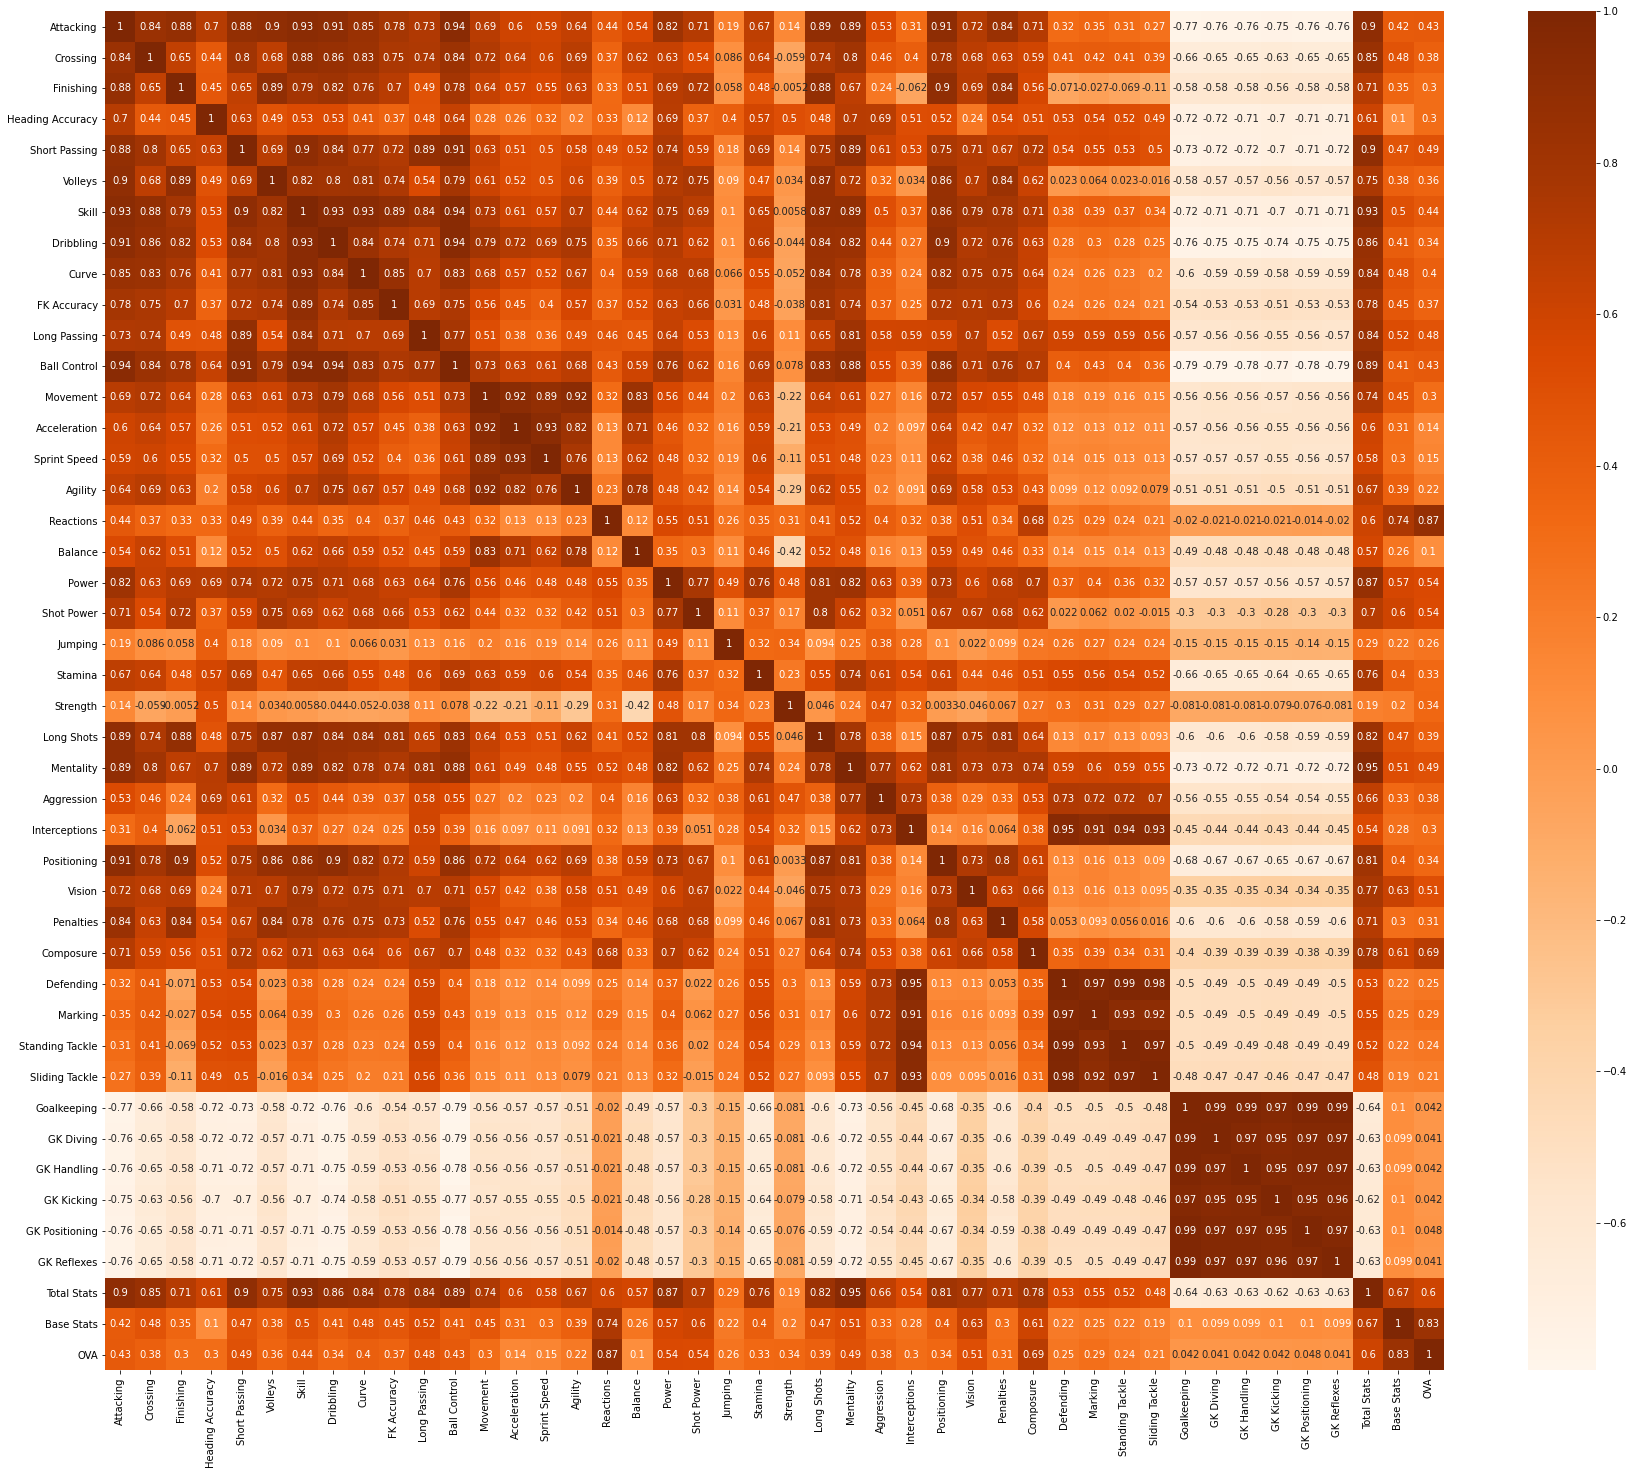

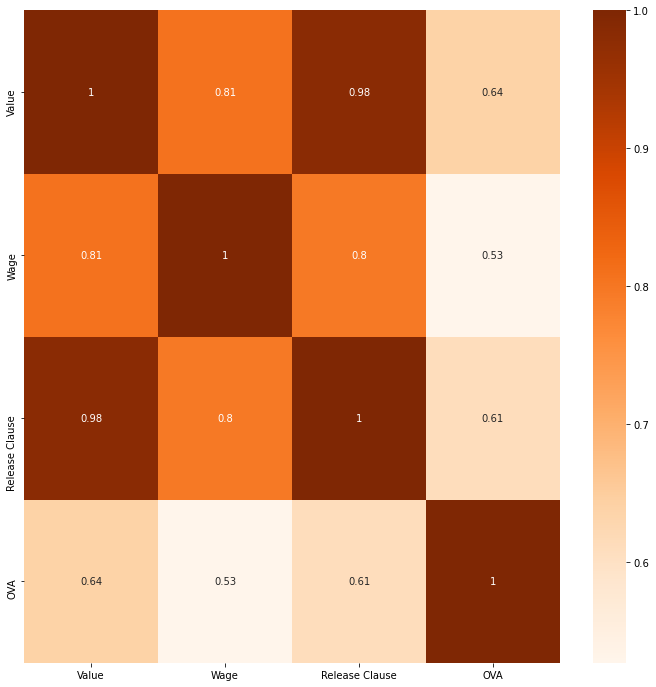

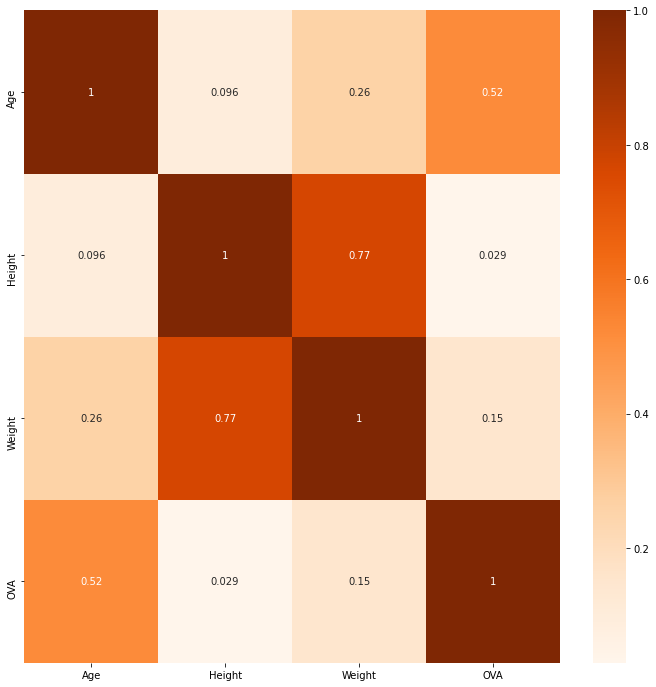

In [21]:
# Visualize the matrices
# Check for the collinearity between features in matrix
def heatmapper(dataframe, size = (20,20)):
    fig = plt.figure(figsize= size)
    correlation_matrix = dataframe.corr()
    heatmap = sns.heatmap(correlation_matrix, cmap = 'Oranges', annot=True)
    return heatmap

heatmapper(player_stats, (30,25))

player_value['Value'] = pd.to_numeric(player_value['Value'])
player_value['Wage'] = pd.to_numeric(player_value['Wage'])
player_value['Release Clause'] = pd.to_numeric(player_value['Release Clause'])

heatmapper(player_value, (12,12))
heatmapper(physical_traits,(12,12))
plt.show()

In [22]:
# Split data into Feature and target sets
#X = fifa_players_clean.drop(['OVA','Position', 'Attacking', 'Skill', 'Movement','Power','Mentality','Defending','Goalkeeping', "Release Clause", 'Base Stats'], axis = 1)
X = fifa_players_clean.drop(['OVA','Position', 'Attacking', 'Skill', 'Movement','Power','Mentality','Defending','Goalkeeping', "Release Clause", 'Base Stats','GK', 'PAC', 'SHO', 'PAS', 'DRI','DEF', 'PHY', 'Hits'], axis = 1)
y = fifa_players_clean['OVA']


In [23]:
#Split data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state = 100)

In [24]:
# normalize X_train values
X_train_numericals = X_train._get_numeric_data()
X_train_categoricals = X_train.select_dtypes('object')

# normalize X_test values
X_test_numericals = X_test._get_numeric_data()
X_test_categoricals = X_test.select_dtypes('object')

In [25]:
# standardize the data with StandardSCaler
StandardTransformer = StandardScaler().fit(X_train_numericals)
X_stand = pd.DataFrame(StandardTransformer.transform(X_train_numericals), columns = X_train_numericals.columns)
X_stand.head()

Age    Height    Weight    Growth     Value      Wage  Crossing  \
0 -1.473382 -1.956428 -1.105036  1.639283 -0.363928 -0.523618  0.746327   
1  0.552661  0.976822  0.528722 -0.951301  1.910995  0.777709  0.913641   
2  0.957870  0.243510  0.654396 -0.951301 -0.336185 -0.475421 -0.759501   
3  0.755265  1.343479  0.842907 -0.951301 -0.424037 -0.379026 -1.317215   
4  0.147453 -0.123147 -0.979362 -0.433184 -0.382423 -0.234434 -1.596072   

   Finishing  Heading Accuracy  Short Passing   Volleys  Dribbling     Curve  \
0  -1.134254         -0.322549      -0.602035 -0.625039  -0.212522 -0.586325   
1   0.202632          1.025137       1.466210  0.279873   0.781885  1.669213   
2  -0.414392          0.732162       0.467747 -1.077495   0.063702 -0.256246   
3  -1.597022          1.435302      -0.316759 -1.247166  -1.262173 -1.081443   
4  -1.237091          0.614972      -0.673353 -1.360280  -1.317418 -1.576561   

   FK Accuracy  Long Passing  Ball Control  Acceleration  Sprint Speed  \
0    -0.480253     -1.493123     -0.603926      1.122585      0.727432   
1     0.318955      1.728754      0.836206     -1.660949     -1.487420   
2     1.346509      0.587672      0.084833     -0.914148     -0.656850   
3    -1.108202     -0.486287     -1.104841     -1.864623     -1.348992   
4    -1.336547     -0.821899     -0.541311     -0.846256     -1.002921   

    Agility  Reactions   Balance  Shot Power   Jumping   Stamina  Strength  \
0  1.333051  -1.537256  1.221554   -1.843265  0.662293  1.347533 -1.500606   
1 -1.076168   1.437959 -1.260725    0.832841  0.412636  1.153013  2.018098   
2 -0.318985   0.225834  0.228642    0.684169 -0.918866  0.245256  0.376036   
3 -1.007333  -0.876097 -1.615336   -1.248575 -2.583243  0.180416  1.705324   
4 -0.938498  -0.104745 -0.125969   -2.140610  1.161606  0.050736  0.688810   

   Long Shots  Aggression  Interceptions  Positioning    Vision  Penalties  \
0   -1.056797   -0.930577       0.779026    -0.648619 -1.420689  -0.721252   
1    0.305761    1.231390       1.451386     0.552343  1.787362   0.612860   
2    0.515385    1.874137       1.019154    -0.857482  0.329157   0.295214   
3   -1.214015    0.062759       0.538897    -0.648619 -1.639420  -0.594194   
4   -1.738075    0.705506       0.971129    -1.431855 -1.931061  -1.102428   

   Composure   Marking  Standing Tackle  Sliding Tackle  GK Diving  \
0  -1.894163  0.295977         0.184840        0.762828  -0.628419   
1   2.241739  1.584709         1.161163        1.234566  -0.569545   
2   0.518447  1.138609         1.068180        1.140218  -0.392923   
3   0.346118  0.593376         0.789230        0.998697  -0.510671   
4  -0.860187  0.841209         0.835722        0.621307  -0.392923   

   GK Handling  GK Kicking  GK Positioning  GK Reflexes  Total Stats  \
0    -0.279990   -0.282010       -0.156718    -0.337205    -0.451281   
1    -0.587424   -0.655131       -0.096243    -0.105977     1.146345   
2    -0.587424   -0.095450       -0.459094    -0.048170     0.360941   
3    -0.402964   -0.157637       -0.519570    -0.048170    -1.110254   
4    -0.402964   -0.282010       -0.217193    -0.163784    -1.025967   

        W/F        SM        IR        LS        ST        RS        LW  \
0 -1.457178 -0.576531 -0.328524 -0.878624 -0.878624 -0.878624 -0.320340   
1  1.508849  0.700712  4.139485  0.650783  0.650783  0.650783  0.530725   
2  0.025835 -0.576531 -0.328524 -0.113920 -0.113920 -0.113920 -0.249418   
3  0.025835 -0.576531 -0.328524 -0.955094 -0.955094 -0.955094 -1.384171   
4  0.025835 -0.576531 -0.328524 -1.184506 -1.184506 -1.184506 -1.313249   

         LF        CF        RF        RW       LAM       CAM       RAM  \
0 -0.685538 -0.685538 -0.685538 -0.320340 -0.640192 -0.640192 -0.640192   
1  0.698418  0.698418  0.698418  0.530725  0.904849  0.904849  0.904849   
2 -0.102819 -0.102819 -0.102819 -0.249418  0.021968  0.021968  0.021968   
3 -1.268256 -1.268256 -1.268256 -1.384171 -1.228780 -1.228780 -1.228780   
4 -1.268256 -

In [26]:
# Standardize the test data
X_stand_test = pd.DataFrame(StandardTransformer.transform(X_test_numericals), columns = X_train_numericals.columns)
X_stand_test.head()

Age    Height    Weight    Growth     Value      Wage  Crossing  \
0 -0.055152  1.343479  1.094254 -0.433184  0.005979  0.247539 -0.536415   
1 -0.662965 -0.856459 -1.544894  0.257638  1.263659  0.681314  0.579013   
2  1.363078 -0.856459 -1.105036 -0.951301  4.130432  1.597062  1.582898   
3  1.160474 -0.856459 -0.853688 -0.951301  0.005979 -0.234434  0.634784   
4 -1.270778  1.343479  1.219928  1.293871 -0.336185 -0.330829  0.244385   

   Finishing  Heading Accuracy  Short Passing   Volleys  Dribbling     Curve  \
0  -0.620067          1.025137       0.396428  0.788886  -0.267767 -0.256246   
1   1.076750         -0.498335       0.753022  0.902000   1.223843  1.064069   
2   2.105123          1.376707       1.323572  2.146254   1.610557  1.614200   
3   0.768238         -0.088169       0.895660  0.619215   0.892374  1.119082   
4   0.202632          0.263401       0.396428  0.279873   0.781885  0.073833   

   FK Accuracy  Long Passing  Ball Control  Acceleration  Sprint Speed  \
0    -0.765684      0.923285     -0.103011     -0.235237      0.104505   
1     0.832732      0.520550      1.086663      1.733604      1.419573   
2     2.031544      0.923285      1.587578      0.851020      1.419573   
3     0.832732      1.124652      0.898820     -0.099455     -0.241566   
4     0.376042      0.453428      0.397905     -0.235237      0.035291   

    Agility  Reactions   Balance  Shot Power   Jumping   Stamina  Strength  \
0 -0.181315   0.225834 -1.686259    0.535496  1.577700  0.180416  1.939904   
1  1.746060   0.776800  1.079709    0.907178 -0.336334  1.088174 -0.093124   
2  1.746060   2.319505  0.512331    1.427532  0.079761  0.374935 -0.405898   
3  0.369363   1.107380  0.866943    1.353196  0.662293  1.217853  0.610616   
4 -0.387820  -0.325132 -0.622425    0.461160 -0.669209  0.180416  0.610616   

   Long Shots  Aggression  Interceptions  Positioning    Vision  Penalties  \
0   -1.056797    1.172959       0.923103    -1.066345 -0.691587  -0.085961   
1    1.249070   -0.989009      -0.133462     0.865638  1.276990   0.485802   
2    1.668318    0.354917      -0.373591     1.648874  1.714452   2.010502   
3    0.882227    0.763938       1.019154     0.813422  1.349901   0.422273   
4   -0.008676    0.238054      -0.469642     0.552343  0.620798   0.485802   

   Composure   Marking  Standing Tackle  Sliding Tackle  GK Diving  \
0   0.863105  0.841209         1.254146        1.093045  -0.334049   
1   1.207764 -0.397956         0.091857       -0.274994  -0.275175   
2   2.155575 -0.397956        -1.256399       -1.312817  -0.216301   
3   1.293928 -0.050990         0.882213        0.810002   0.019195   
4  -0.170870 -0.348389        -0.373059       -0.227821  -0.216301   

   GK Handling  GK Kicking  GK Positioning  GK Reflexes  Total Stats  \
0    -0.341477    0.028924       -0.519570    -0.221591     0.249836   
1    -0.157017   -0.033263       -0.096243    -0.048170     1.046733   
2     0.027443   -0.406384       -0.217193    -0.163784     1.644406   
3    -0.525937   -0.157637       -0.580045    -0.048170     1.199983   
4    -0.464450   -0.282010       -0.338144    -0.337205     0.085092   

        W/F        SM        IR        LS        ST        RS        LW  \
0 -1.457178 -0.576531 -0.328524 -0.113920 -0.113920 -0.113920 -0.391262   
1  0.025835  1.977955 -0.328524  1.033135  1.033135  1.033135  1.239946   
2  1.508849  0.700712  1.905481  1.950780  1.950780  1.950780  1.878244   
3  1.508849  0.700712 -0.328524  0.880194  0.880194  0.880194  0.814413   
4  0.025835 -0.576531 -0.328524  0.421372  0.421372  0.421372  0.388881   

         LF        CF        RF        RW       LAM       CAM       RAM  \
0 -0.394178 -0.394178 -0.394178 -0.391262 -0.345899 -0.345899 -0.345899   
1  1.208297  1.208297  1.208297  1.239946  1.272716  1.272716  1.272716   
2  1.936695  1.936695  1.936695  1.878244  1.861303  1.861303  1.861303   
3  0.916938  0.916938  0.916938  0.814413  0.978422  0.978422  0.978422   
4  0.407059  

In [27]:
# normalize the data with MinMaxSCaler
MinMaxTransformer = MinMaxScaler().fit(X_train_numericals)
X_norms = pd.DataFrame(MinMaxTransformer.transform(X_train_numericals), columns = X_train_numericals.columns)



In [28]:
# normalize the test data
X_norms_test = pd.DataFrame(MinMaxTransformer.transform(X_test_numericals), columns = X_test_numericals.columns)

X_norms_test.shape


(3425, 70)

In [29]:
# Create encoder to convert categorical values to numerical
X_encoder = OneHotEncoder().fit(X_train_categoricals)

# encode training data as array
X_train_encoded = X_encoder.transform(X_train_categoricals).toarray()

new_headers = (['Right Foot', 'Left Foot'],['A/W High', 'A/W Low', 'A/W Medium', 'A/W nan'],['D/W High', 'D/W Low', 'D/W Medium','A/W nan'])

category_columns = []
for columns in new_headers:
    for column_header in columns:
        category_columns.append(column_header)
X_train_encoded = pd.DataFrame(X_train_encoded, columns = category_columns)
X_train_encoded.drop(['A/W nan'], axis = 1, inplace= True)

In [30]:
# Prepare Testing data
X_test_encoded = X_encoder.transform(X_test_categoricals).toarray()

new_headers = (['Right Foot', 'Left Foot'],['A/W High', 'A/W Low', 'A/W Medium', 'A/W nan'],['D/W High', 'D/W Low', 'D/W Medium', 'A/W nan'])

category_columns = []
for columns in new_headers:
    for column_header in columns:
        category_columns.append(column_header)

X_test_encoded = pd.DataFrame(X_test_encoded, columns = category_columns)
X_test_encoded.drop(['A/W nan'], axis = 1, inplace = True)
X_test_encoded.head()


Right Foot  Left Foot  A/W High  A/W Low  A/W Medium  D/W High  D/W Low  \
0         0.0        1.0       1.0      0.0         0.0       0.0      0.0   
1         0.0        1.0       1.0      0.0         0.0       0.0      0.0   
2         1.0        0.0       1.0      0.0         0.0       1.0      0.0   
3         0.0        1.0       0.0      0.0         1.0       0.0      0.0   
4         0.0        1.0       0.0      0.0         1.0       0.0      0.0   

   D/W Medium  
0         1.0  
1         1.0  
2         0.0  
3         1.0  
4         1.0

In [31]:
# Merge X training data in two sets for training
X_train_norm = pd.concat([X_norms,X_train_encoded], axis = 1)
X_train_stand = pd.concat([X_stand ,X_train_encoded], axis = 1) 
X_train_norm.shape

(10275, 78)

In [32]:
# Merge X testing data in two sets for testing
X_test_norm = pd.concat([X_norms_test, X_test_encoded], axis = 1)
X_test_stand = pd.concat([X_stand_test, X_test_encoded], axis = 1) 

X_test_norm.head()

Age  Height    Weight    Growth     Value      Wage  Crossing  \
0  0.290323     0.7  0.523810  0.148148  0.031023  0.030411  0.409091   
1  0.193548     0.4  0.190476  0.296296  0.109185  0.046512  0.636364   
2  0.516129     0.4  0.246032  0.037037  0.287348  0.080501  0.840909   
3  0.483871     0.4  0.277778  0.037037  0.031023  0.012522  0.647727   
4  0.096774     0.7  0.539683  0.518519  0.009759  0.008945  0.568182   

   Finishing  Heading Accuracy  Short Passing   Volleys  Dribbling     Curve  \
0   0.358696          0.750000       0.674419  0.639535   0.527473  0.455556   
1   0.717391          0.454545       0.732558  0.662791   0.824176  0.722222   
2   0.934783          0.818182       0.825581  0.918605   0.901099  0.833333   
3   0.652174          0.534091       0.755814  0.604651   0.758242  0.733333   
4   0.532609          0.602273       0.674419  0.534884   0.736264  0.522222   

   FK Accuracy  Long Passing  Ball Control  Acceleration  Sprint Speed  \
0     0.292135      0.698795      0.593407      0.588235      0.650602   
1     0.606742      0.626506      0.802198      0.929412      0.879518   
2     0.842697      0.698795      0.890110      0.776471      0.879518   
3     0.606742      0.734940      0.769231      0.611765      0.590361   
4     0.516854      0.614458      0.681319      0.588235      0.638554   

    Agility  Reactions   Balance  Shot Power   Jumping   Stamina  Strength  \
0  0.592593   0.577465  0.276316    0.662651  0.849315  0.639535  0.909091   
1  0.938272   0.647887  0.789474    0.722892  0.534247  0.802326  0.571429   
2  0.938272   0.845070  0.684211    0.807229  0.602740  0.674419  0.519481   
3  0.691358   0.690141  0.750000    0.795181  0.698630  0.825581  0.688312   
4  0.555556   0.507042  0.473684    0.650602  0.479452  0.639535  0.688312   

   Long Shots  Aggression  Interceptions  Positioning    Vision  Penalties  \
0    0.277778    0.779070       0.681319     0.319149  0.423529   0.482759   
1    0.766667    0.348837       0.439560     0.712766  0.741176   0.586207   
2    0.855556    0.616279       0.384615     0.872340  0.811765   0.862069   
3    0.688889    0.697674       0.703297     0.702128  0.752941   0.574713   
4    0.500000    0.593023       0.362637     0.648936  0.635294   0.586207   

   Composure   Marking  Standing Tackle  Sliding Tackle  GK Diving  \
0   0.686747  0.685393         0.821429        0.746988   0.090909   
1   0.734940  0.404494         0.523810        0.397590   0.102273   
2   0.867470  0.404494         0.178571        0.132530   0.113636   
3   0.746988  0.483146         0.726190        0.674699   0.159091   
4   0.542169  0.415730         0.404762        0.409639   0.113636   

   GK Handling  GK Kicking  GK Positioning  GK Reflexes  Total Stats   W/F  \
0     0.088889    0.163043        0.056180     0.123596     0.613477  0.25   
1     0.122222    0.152174        0.134831     0.157303     0.745709  0.50   
2     0.155556    0.086957        0.112360     0.134831     0.844882  0.75   
3     0.055556    0.130435        0.044944     0.157303     0.771138  0.75   
4     0.066667    0.108696        0.089888     0.101124     0.586141  0.50   

     SM    IR        LS        ST        RS        LW        LF        CF  \
0  0.25  0.00  0.526316  0.526316  0.526316  0.487179  0.474359  0.474359   
1  0.75  0.00  0.723684  0.723684  0.723684  0.782051  0.756410  0.756410   
2  0.50  0.25  0.881579  0.881579  0.881579  0.897436  0.884615  0.884615   
3  0.50  0.00  0.697368  0.697368  0.697368  0.705128  0.705128  0.705128   
4  0.25  0.00  0.618421  0.618421  0.618421  0.628205  0.615385  0.615385   

         RF        RW       LAM       CAM       RAM        LM       LCM  \
0  0.474359  0.487179  0.487179  0.487179  0.487179  0.526316  0.581081   
1  0.756410  0.782051  0.769231  0.769231  0.769231  0.776316  0.743243   
2  0.884615  0.897436  0.871795  0.871795  0.871795  0.881579  0.810811   
3  0.705128  0.705128  0.717949  0.717949  0.717949 

In [33]:
# train Model 1 on normalized numerical data

Model1 = LinearRegression().fit(X_train_norm, y_train)

training_predictions1 = Model1.predict(X_train_norm)

#Evaluate Model1 training performance
r2 = r2_score(y_train, training_predictions1)
mse = round(mean_squared_error(y_train, training_predictions1), 2)
rmse = round(sqrt(mean_squared_error(y_train, training_predictions1)), 2)
mae = round(mean_absolute_error(y_train, training_predictions1), 2)



In [34]:
# test Model 1 on normalized numerical data
test_predictions1 = Model1.predict(X_test_norm)

#Evaluate Model1 training performance
r2_test = r2_score(y_test, test_predictions1)
mse_test = round(mean_squared_error(y_test, test_predictions1), 2)
rmse_test = round(sqrt(mean_squared_error(y_test, test_predictions1)), 2)
mae_test = round(mean_absolute_error(y_test, test_predictions1), 2)

In [35]:
print(f'Results of Model 1 Performance:\nTraining Performance\nR2 Score:  {r2}\nMean Squared Error:  {mse}\nRoot Mean Squared Error:  {rmse}\nMean Absolute Error: {rmse}\n')
print(f'Results of Model 1 Performance:\nTesting Performance\nR2 Score:  {r2_test}\nMean Squared Error:  {mse_test}\nRoot Mean Squared Error:  {rmse}\nMean Absolute Error:  {mae_test}\n')

Results of Model 1 Performance:
Training Performance
R2 Score:  0.8976031218291649
Mean Squared Error:  4.84
Root Mean Squared Error:  2.2
Mean Absolute Error: 2.2

Results of Model 1 Performance:
Testing Performance
R2 Score:  0.8974913104410563
Mean Squared Error:  4.75
Root Mean Squared Error:  2.2
Mean Absolute Error:  1.68



In [36]:
# train Model 2 on normalized numerical data

Model2 = LinearRegression().fit(X_train_stand, y_train)

training_predictions2 = Model2.predict(X_train_stand)

#Evaluate Model1 training performance
r2_2 = r2_score(y_train, training_predictions2)
mse_2 = round(mean_squared_error(y_train, training_predictions2), 2)
rmse_2 = round(sqrt(mean_squared_error(y_train, training_predictions2)), 2)
mae_2 = round(mean_absolute_error(y_train, training_predictions2), 2)

In [37]:
# test Model 2 on normalized numerical data
test_predictions2 = Model2.predict(X_test_stand)

#Evaluate Model1 training performance
r2_test2 = r2_score(y_test, test_predictions2)
mse_test2 = round(mean_squared_error(y_test, test_predictions2), 2)
rmse_test2 = round(sqrt(mean_squared_error(y_test, test_predictions2)), 2)
mae_test2 = round(mean_absolute_error(y_test, test_predictions2), 2)

In [38]:
print(f'Results of Model 2 Performance:\nTraining Performance\nR2 Score:  {r2_2}\nMean Squared Error:  {mse_2}\nRoot Mean Squared Error:  {rmse_2}\nMean Absolute Error: {rmse_2}\n')
print(f'Results of Model 2 Performance:\nTesting Performance\nR2 Score:  {r2_test2}\nMean Squared Error:  {mse_test2}\nRoot Mean Squared Error:  {rmse_test2}\nMean Absolute Error:  {mae_test2}\n')

Results of Model 2 Performance:
Training Performance
R2 Score:  0.8976272534625214
Mean Squared Error:  4.84
Root Mean Squared Error:  2.2
Mean Absolute Error: 2.2

Results of Model 2 Performance:
Testing Performance
R2 Score:  0.8974063117143667
Mean Squared Error:  4.75
Root Mean Squared Error:  2.18
Mean Absolute Error:  1.69



In [39]:
# create plot of predicted values against actual values to visualize model performance.
Model1_train = pd.DataFrame(training_predictions1,columns = ['Predicted OVA'])
Model1_test = pd.DataFrame(test_predictions1, columns = ['Predicted OVA'])
Model1_results = pd.concat([Model1_train, Model1_test], axis = 0).reset_index()
y_values = pd.DataFrame(y).reset_index()

plot_results = pd.concat([y_values, Model1_results], axis = 1)
plot_results.drop('index', axis = 1, inplace = True)


<Figure size 2160x1440 with 0 Axes>

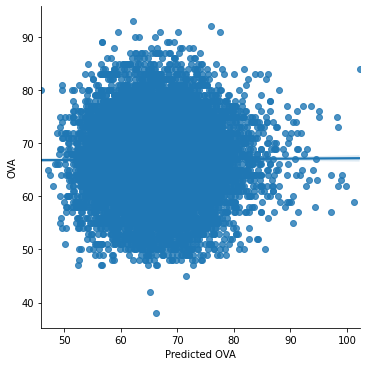

In [40]:
fig = plt.figure(figsize=(30,20))
sns.lmplot(x='Predicted OVA', y = 'OVA', data = plot_results, fit_reg=True)
plt.show()

In [41]:
fifa_new_data = pd.read_csv('fifa_new_data.csv')
fifa_new_data.columns[10:25]

Index(['club', 'potential', 'value_eur', 'wage_eur', 'player_positions',
       'preferred_foot', 'international_reputation', 'weak_foot',
       'skill_moves', 'work_rate', 'body_type', 'real_face',
       'release_clause_eur', 'player_tags', 'team_position'],
      dtype='object')

In [42]:
# drop columns that will not be used for predictions.
fifa_new_data= fifa_new_data.drop(['Unnamed: 0','sofifa_id','player_url','short_name','long_name','nationality', 'club','nation_jersey_number', 'dob','body_type', 'player_tags', 'player_positions','real_face', 'team_position','team_jersey_number','loaned_from','contract_valid_until','nation_position','joined', 'player_traits','pace','shooting','passing','dribbling','defending', 'physic','gk_diving','gk_handling', 'gk_kicking','gk_reflexes','gk_speed','gk_positioning', 'release_clause_eur'], axis = 1)
fifa_new_data.shape

(1000, 71)

In [43]:
X.columns
    

Index(['Age', 'Height', 'Weight', 'foot', 'Growth', 'Value', 'Wage',
       'Crossing', 'Finishing', 'Heading Accuracy', 'Short Passing', 'Volleys',
       'Dribbling', 'Curve', 'FK Accuracy', 'Long Passing', 'Ball Control',
       'Acceleration', 'Sprint Speed', 'Agility', 'Reactions', 'Balance',
       'Shot Power', 'Jumping', 'Stamina', 'Strength', 'Long Shots',
       'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
       'Composure', 'Marking', 'Standing Tackle', 'Sliding Tackle',
       'GK Diving', 'GK Handling', 'GK Kicking', 'GK Positioning',
       'GK Reflexes', 'Total Stats', 'W/F', 'SM', 'A/W', 'D/W', 'IR', 'LS',
       'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM',
       'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB',
       'LCB', 'CB', 'RCB', 'RB'],
      dtype='object')

In [44]:
# Reassign header names to new data to match training data headers.
new_columns = ['Age','Height', 'Weight','Growth', 'Value',
       'Wage','Foot','IR', 'W/F', 'SM','Work Rate','Crossing', 'Finishing',
       'Heading Accuracy', 'Short Passing', 'Volleys','Dribbling',
       'Curve', 'FK Accuracy', 'Long Passing', 'Ball Control',
       'Acceleration', 'Sprint Speed', 'Agility', 'Reactions', 'Balance',
       'Shot Power', 'Jumping', 'Stamina', 'Strength', 'Long Shots',
       'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Marking', 'Standing Tackle',
       'Sliding Tackle', 'GK Diving', 'GK Handling',
       'GK Kicking', 'GK Positioning', 'GK Reflexes','LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF',
       'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB']
fifa_new_data.columns = new_columns
fifa_new_data.shape


(1000, 71)

In [45]:
AW=[]
DW=[]
for value in fifa_new_data["Work Rate"].values:
    value=value.split("/")
    AW.append(value[0])
    DW.append(value[1])
fifa_new_data["A/W"]=AW
fifa_new_data["D/W"]=DW
fifa_new_data= fifa_new_data.drop(['Work Rate'],axis=1)


In [46]:
Total_stats = fifa_new_data['Crossing']+fifa_new_data['Finishing'] +fifa_new_data['Heading Accuracy'] +fifa_new_data[ 'Short Passing'] +fifa_new_data[ 'Volleys'] +fifa_new_data['Dribbling'] +fifa_new_data['Curve'] +fifa_new_data['FK Accuracy'] +fifa_new_data['Long Passing'] + fifa_new_data['Ball Control'] + fifa_new_data['Acceleration'] +fifa_new_data['Sprint Speed'] +fifa_new_data['Agility'] + fifa_new_data['Reactions'] + fifa_new_data['Balance'] + fifa_new_data['Shot Power'] +fifa_new_data['Jumping'] +fifa_new_data['Stamina'] +fifa_new_data['Strength'] + fifa_new_data['Long Shots'] + fifa_new_data['Aggression'] +fifa_new_data['Interceptions'] + fifa_new_data['Positioning'] + fifa_new_data['Vision'] + fifa_new_data['Penalties'] +fifa_new_data['Composure'] +fifa_new_data['Marking'] +fifa_new_data['Standing Tackle'] + fifa_new_data['Sliding Tackle'] +fifa_new_data['GK Diving'] +fifa_new_data['GK Handling'] +fifa_new_data['GK Kicking'] +fifa_new_data['GK Positioning']+fifa_new_data['GK Reflexes']

fifa_new_data['Total Stats'] = Total_stats
fifa_new_data.head()

Age  Height  Weight  Growth   Value  Wage   Foot  IR  W/F  SM  Crossing  \
0   20     191      78      65   90000  1000  Right   1    3   2        31   
1   31     186      81      62  190000  1000  Right   1    2   1        18   
2   23     169      64      63  140000  1000  Right   1    2   3        52   
3   20     192      87      69  230000  1000  Right   1    4   2        37   
4   22     174      64      75  975000  3000  Right   1    3   3        59   

   Finishing  Heading Accuracy  Short Passing  Volleys  Dribbling  Curve  \
0         24                51             38       28         37     24   
1         11                11             23       15         10     12   
2         54                38             59       41         61     52   
3         31                60             46       34         26     21   
4         54                39             69       41         65     61   

   FK Accuracy  Long Passing  Ball Control  Acceleration  Sprint Speed  \
0           27            31            38            54            57   
1           11            21            25            41            40   
2           46            54            62            74            73   
3           25            29            43            55            57   
4           57            66            68            60            55   

   Agility  Reactions  Balance  Shot Power  Jumping  Stamina  Strength  \
0       37         44       41          34       62       58        67   
1       47         64       30          47       64       34        60   
2       71         46       71          58       54       58        57   
3       44         58       50          62       54       61        82   
4       66         66       75          56       35       74        47   

   Long Shots  Aggression  Interceptions  Positioning  Vision  Penalties  \
0          23          44             48           24      31         37   
1          17          32             18            9      12         22   
2          44          36             24           41      53         49   
3          27          72             48           31      29         34   
4          48          72             58           57      66         45   

   Composure  Marking  Standing Tackle  Sliding Tackle  GK Diving  \
0         42       47               55              54          9   
1         47       21               11              11         60   
2         53       37               33              32         10   
3         43       51               61              54         12   
4         63       54               54              52          7   

   GK Handling  GK Kicking  GK Positioning  GK Reflexes    LS    ST    RS  \
0            7           6              13           10  37+2  37+2  37+2   
1           61          62              63           60   NaN   NaN   NaN   
2           10           8               6            9  53+2  53+2  53+2   
3           10           8               7           15  45+2  45+2  45+2   
4           10          12              11           13  56+2  56+2  56+2   

     LW    LF    CF    RF    RW   LAM   CAM   RAM    LM   LCM    CM   RCM  \
0  36+2  35+2  35+2  35+2  36+2  35+2  35+2  35+2  38+2  37+2  37+2  37+2   
1   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2  57+2  55+2  55+2  55+2  57+2  56+2  56+2  56+2  57+2  52+2  52+2  52+2   
3  39+2  40+2  40+2  40+2  39+2  38+2  38+2  38+2  40+2  40+2  40+2  40+2   
4  61+2  61+2  61+2  61+2  61+2  63+2  63+2  63+2  63+2  64+2  64+2  64+2   

     RM   LWB   LDM   CDM   RDM   RWB    LB   LCB    CB   RCB    RB     A/W  \
0  38+2  46+2  45+2  45+2  45+2  46+2  48+2  51+2  51+2  51+2  48+2  Medium   
1   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  Medium   
2  57+2  47+2  45+2  45+2  45+2  47+2  45+2  39+2  39+2  39+2  45+2  Medium   
3  40+2  50+2  50+2  50+2  50+2  50+2  52+2  58+2  58+2  58+2  52+2  Medi

In [47]:
NaN_percenter(fifa_new_data)

feature  PercentNaNs
0                Age          0.0
1             Height          0.0
2             Weight          0.0
3             Growth          0.0
4              Value          0.0
5               Wage          0.0
6               Foot          0.0
7                 IR          0.0
8                W/F          0.0
9                 SM          0.0
10          Crossing          0.0
11         Finishing          0.0
12  Heading Accuracy          0.0
13     Short Passing          0.0
14           Volleys          0.0
15         Dribbling          0.0
16             Curve          0.0
17       FK Accuracy          0.0
18      Long Passing          0.0
19      Ball Control          0.0
20      Acceleration          0.0
21      Sprint Speed          0.0
22           Agility          0.0
23         Reactions          0.0
24           Balance          0.0
25        Shot Power          0.0
26           Jumping          0.0
27           Stamina          0.0
28          Strength          0.0
29        Long Shots          0.0
30        Aggression          0.0
31     Interceptions          0.0
32       Positioning          0.0
33            Vision          0.0
34         Penalties          0.0
35         Composure          0.0
36           Marking          0.0
37   Standing Tackle          0.0
38    Sliding Tackle          0.0
39         GK Diving          0.0
40       GK Handling          0.0
41        GK Kicking          0.0
42    GK Positioning          0.0
43       GK Reflexes          0.0
44                LS         11.9
45                ST         11.9
46                RS         11.9
47                LW         11.9
48                LF         11.9
49                CF         11.9
50                RF         11.9
51                RW         11.9
52               LAM         11.9
53               CAM         11.9
54               RAM         11.9
55                LM         11.9
56               LCM         11.9
57                CM         11.9
58               RCM         11.9
59                RM         11.9
60               LWB         11.9
61               LDM         11.9
62               CDM         11.9
63               RDM         11.9
64               RWB         11.9
65                LB         11.9
66               LCB         11.9
67                CB         11.9
68               RCB         11.9
69                RB         11.9
70               A/W          0.0
71               D/W          0.0
72       Total Stats          0.0

In [48]:
to_fill_na = ['LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF','RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM',
             'CM', 'RCM', 'RM', 'LWB', 'LDM','CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB']
for column in to_fill_na:
    fifa_new_data[column] = fifa_new_data[column].fillna(fifa_new_data[column].mode().iloc[0])

NaN_percenter(fifa_new_data)

feature  PercentNaNs
0                Age          0.0
1             Height          0.0
2             Weight          0.0
3             Growth          0.0
4              Value          0.0
5               Wage          0.0
6               Foot          0.0
7                 IR          0.0
8                W/F          0.0
9                 SM          0.0
10          Crossing          0.0
11         Finishing          0.0
12  Heading Accuracy          0.0
13     Short Passing          0.0
14           Volleys          0.0
15         Dribbling          0.0
16             Curve          0.0
17       FK Accuracy          0.0
18      Long Passing          0.0
19      Ball Control          0.0
20      Acceleration          0.0
21      Sprint Speed          0.0
22           Agility          0.0
23         Reactions          0.0
24           Balance          0.0
25        Shot Power          0.0
26           Jumping          0.0
27           Stamina          0.0
28          Strength          0.0
29        Long Shots          0.0
30        Aggression          0.0
31     Interceptions          0.0
32       Positioning          0.0
33            Vision          0.0
34         Penalties          0.0
35         Composure          0.0
36           Marking          0.0
37   Standing Tackle          0.0
38    Sliding Tackle          0.0
39         GK Diving          0.0
40       GK Handling          0.0
41        GK Kicking          0.0
42    GK Positioning          0.0
43       GK Reflexes          0.0
44                LS          0.0
45                ST          0.0
46                RS          0.0
47                LW          0.0
48                LF          0.0
49                CF          0.0
50                RF          0.0
51                RW          0.0
52               LAM          0.0
53               CAM          0.0
54               RAM          0.0
55                LM          0.0
56               LCM          0.0
57                CM          0.0
58               RCM          0.0
59                RM          0.0
60               LWB          0.0
61               LDM          0.0
62               CDM          0.0
63               RDM          0.0
64               RWB          0.0
65                LB          0.0
66               LCB          0.0
67                CB          0.0
68               RCB          0.0
69                RB          0.0
70               A/W          0.0
71               D/W          0.0
72       Total Stats          0.0

In [49]:
player_position_vals = fifa_new_data[['LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF',
       'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB']]

player_position_vals.head()
for column in player_position_vals: 
       new_values = [] 
       for value in player_position_vals[column]:      
              if len(str(value)) == 5:
                     value = value[:-3]
                     value = float(value)
                     new_values.append(value)
              elif len(str(value)) <= 4:
                     value = value[:-2]
                     value = float(value)
                     new_values.append(value)
              else:
                     value = float(value)
                     new_values.append(value)
       player_position_vals[column] = new_values

player_position_vals.head()


C:\Users\Ish\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


LS    ST    RS    LW    LF    CF    RF    RW   LAM   CAM   RAM    LM  \
0  37.0  37.0  37.0  36.0  35.0  35.0  35.0  36.0  35.0  35.0  35.0  38.0   
1  62.0  62.0  62.0  67.0  62.0  62.0  62.0  67.0  63.0  63.0  63.0  61.0   
2  53.0  53.0  53.0  57.0  55.0  55.0  55.0  57.0  56.0  56.0  56.0  57.0   
3  45.0  45.0  45.0  39.0  40.0  40.0  40.0  39.0  38.0  38.0  38.0  40.0   
4  56.0  56.0  56.0  61.0  61.0  61.0  61.0  61.0  63.0  63.0  63.0  63.0   

    LCM    CM   RCM    RM   LWB   LDM   CDM   RDM   RWB    LB   LCB    CB  \
0  37.0  37.0  37.0  38.0  46.0  45.0  45.0  45.0  46.0  48.0  51.0  51.0   
1  58.0  58.0  58.0  61.0  64.0  59.0  59.0  59.0  64.0  59.0  64.0  64.0   
2  52.0  52.0  52.0  57.0  47.0  45.0  45.0  45.0  47.0  45.0  39.0  39.0   
3  40.0  40.0  40.0  40.0  50.0  50.0  50.0  50.0  50.0  52.0  58.0  58.0   
4  64.0  64.0  64.0  63.0  61.0  62.0  62.0  62.0  61.0  59.0  54.0  54.0   

    RCB    RB  
0  51.0  48.0  
1  64.0  59.0  
2  39.0  45.0  
3  58.0  52.0  
4  54.0  59.0

In [50]:
fifa_new_data[['LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF',
       'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB']] = player_position_vals

In [51]:
fifa_new_data.head()

Age  Height  Weight  Growth   Value  Wage   Foot  IR  W/F  SM  Crossing  \
0   20     191      78      65   90000  1000  Right   1    3   2        31   
1   31     186      81      62  190000  1000  Right   1    2   1        18   
2   23     169      64      63  140000  1000  Right   1    2   3        52   
3   20     192      87      69  230000  1000  Right   1    4   2        37   
4   22     174      64      75  975000  3000  Right   1    3   3        59   

   Finishing  Heading Accuracy  Short Passing  Volleys  Dribbling  Curve  \
0         24                51             38       28         37     24   
1         11                11             23       15         10     12   
2         54                38             59       41         61     52   
3         31                60             46       34         26     21   
4         54                39             69       41         65     61   

   FK Accuracy  Long Passing  Ball Control  Acceleration  Sprint Speed  \
0           27            31            38            54            57   
1           11            21            25            41            40   
2           46            54            62            74            73   
3           25            29            43            55            57   
4           57            66            68            60            55   

   Agility  Reactions  Balance  Shot Power  Jumping  Stamina  Strength  \
0       37         44       41          34       62       58        67   
1       47         64       30          47       64       34        60   
2       71         46       71          58       54       58        57   
3       44         58       50          62       54       61        82   
4       66         66       75          56       35       74        47   

   Long Shots  Aggression  Interceptions  Positioning  Vision  Penalties  \
0          23          44             48           24      31         37   
1          17          32             18            9      12         22   
2          44          36             24           41      53         49   
3          27          72             48           31      29         34   
4          48          72             58           57      66         45   

   Composure  Marking  Standing Tackle  Sliding Tackle  GK Diving  \
0         42       47               55              54          9   
1         47       21               11              11         60   
2         53       37               33              32         10   
3         43       51               61              54         12   
4         63       54               54              52          7   

   GK Handling  GK Kicking  GK Positioning  GK Reflexes    LS    ST    RS  \
0            7           6              13           10  37.0  37.0  37.0   
1           61          62              63           60  62.0  62.0  62.0   
2           10           8               6            9  53.0  53.0  53.0   
3           10           8               7           15  45.0  45.0  45.0   
4           10          12              11           13  56.0  56.0  56.0   

     LW    LF    CF    RF    RW   LAM   CAM   RAM    LM   LCM    CM   RCM  \
0  36.0  35.0  35.0  35.0  36.0  35.0  35.0  35.0  38.0  37.0  37.0  37.0   
1  67.0  62.0  62.0  62.0  67.0  63.0  63.0  63.0  61.0  58.0  58.0  58.0   
2  57.0  55.0  55.0  55.0  57.0  56.0  56.0  56.0  57.0  52.0  52.0  52.0   
3  39.0  40.0  40.0  40.0  39.0  38.0  38.0  38.0  40.0  40.0  40.0  40.0   
4  61.0  61.0  61.0  61.0  61.0  63.0  63.0  63.0  63.0  64.0  64.0  64.0   

     RM   LWB   LDM   CDM   RDM   RWB    LB   LCB    CB   RCB    RB     A/W  \
0  38.0  46.0  45.0  45.0  45.0  46.0  48.0  51.0  51.0  51.0  48.0  Medium   
1  61.0  64.0  59.0  59.0  59.0  64.0  59.0  64.0  64.0  64.0  59.0  Medium   
2  57.0  47.0  45.0  45.0  45.0  47.0  45.0  39.0  39.0  39.0  45.0  Medium   
3  40.0  50.0  50.0  50.0  50.0  50.0  52.0  58.0  58.0  58.0  52.0  Medi

In [52]:
# Compare new data versus training data.
# X.shape
# X_new.shape

X_new = fifa_new_data.copy()
X_new.shape


(1000, 73)

In [53]:
# reorder column headers in new data to match training data.
X_new = X_new[['Age', 'Height', 'Weight', 'Foot', 'Growth', 'Value', 'Wage', 'Crossing', 'Finishing', 'Heading Accuracy', 'Short Passing', 'Volleys', 'Dribbling', 'Curve', 'FK Accuracy', 'Long Passing', 'Ball Control', 'Acceleration', 'Sprint Speed', 'Agility', 'Reactions', 'Balance', 'Shot Power', 'Jumping', 'Stamina', 'Strength', 'Long Shots', 'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure', 'Marking', 'Standing Tackle', 'Sliding Tackle', 'GK Diving', 'GK Handling', 'GK Kicking', 'GK Positioning', 'GK Reflexes', 'Total Stats', 'W/F', 'SM', 'A/W', 'D/W', 'IR', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB']]
X_new.head() 

Age  Height  Weight   Foot  Growth   Value  Wage  Crossing  Finishing  \
0   20     191      78  Right      65   90000  1000        31         24   
1   31     186      81  Right      62  190000  1000        18         11   
2   23     169      64  Right      63  140000  1000        52         54   
3   20     192      87  Right      69  230000  1000        37         31   
4   22     174      64  Right      75  975000  3000        59         54   

   Heading Accuracy  Short Passing  Volleys  Dribbling  Curve  FK Accuracy  \
0                51             38       28         37     24           27   
1                11             23       15         10     12           11   
2                38             59       41         61     52           46   
3                60             46       34         26     21           25   
4                39             69       41         65     61           57   

   Long Passing  Ball Control  Acceleration  Sprint Speed  Agility  Reactions  \
0            31            38            54            57       37         44   
1            21            25            41            40       47         64   
2            54            62            74            73       71         46   
3            29            43            55            57       44         58   
4            66            68            60            55       66         66   

   Balance  Shot Power  Jumping  Stamina  Strength  Long Shots  Aggression  \
0       41          34       62       58        67          23          44   
1       30          47       64       34        60          17          32   
2       71          58       54       58        57          44          36   
3       50          62       54       61        82          27          72   
4       75          56       35       74        47          48          72   

   Interceptions  Positioning  Vision  Penalties  Composure  Marking  \
0             48           24      31         37         42       47   
1             18            9      12         22         47       21   
2             24           41      53         49         53       37   
3             48           31      29         34         43       51   
4             58           57      66         45         63       54   

   Standing Tackle  Sliding Tackle  GK Diving  GK Handling  GK Kicking  \
0               55              54          9            7           6   
1               11              11         60           61          62   
2               33              32         10           10           8   
3               61              54         12           10           8   
4               54              52          7           10          12   

   GK Positioning  GK Reflexes  Total Stats  W/F  SM     A/W     D/W  IR  \
0              13           10         1233    3   2  Medium  Medium   1   
1              63           60         1090    2   1  Medium  Medium   1   
2               6            9         1526    2   3  Medium  Medium   1   
3               7           15         1377    4   2  Medium  Medium   1   
4              11           13         1735    3   3  Medium    High   1   

     LS    ST    RS    LW    LF    CF    RF    RW   LAM   CAM   RAM    LM  \
0  37.0  37.0  37.0  36.0  35.0  35.0  35.0  36.0  35.0  35.0  35.0  38.0   
1  62.0  62.0  62.0  67.0  62.0  62.0  62.0  67.0  63.0  63.0  63.0  61.0   
2  53.0  53.0  53.0  57.0  55.0  55.0  55.0  57.0  56.0  56.0  56.0  57.0   
3  45.0  45.0  45.0  39.0  40.0  40.0  40.0  39.0  38.0  38.0  38.0  40.0   
4  56.0  56.0  56.0  61.0  61.0  61.0  61.0  61.0  63.0  63.0  63.0  63.0   

    LCM    CM   RCM    RM   LWB   LDM   CDM   RDM   RWB    LB   LCB    CB  \
0  37.0  37.0  37.0  38.0  46.0  45.0  45.0  45.0  46.0  48.0  51.0  51.0   
1  58.0  58.0  58.0  61.0  64.0  59.0  59.0  59.0  64.0  59.0  64.0  64.0   
2  52.0  52.0  52.0  57.0  47.0  45.0  45.0  45.0  47.0  45.0  39.0  39.0   
3  40.0  40.0  

In [54]:
# transform X categorical and numerical data.
X_new_nums = X_new._get_numeric_data()
X_new_cats = X_new.select_dtypes('object')

In [55]:
# standardize and normalize new numerical data 
X_new_num_1 = pd.DataFrame(MinMaxTransformer.transform(X_new_nums)) 

X_new_num_2 = pd.DataFrame(StandardTransformer.transform(X_new_nums))



In [56]:
# encode categorical data with onehot encoding

X_new_cats_encoded = X_encoder.transform(X_new_cats).toarray()

new_headers = (['Right Foot', 'Left Foot'],['A/W High', 'A/W Low', 'A/W Medium', 'A/W nan'],['D/W High', 'D/W Low', 'D/W Medium','A/W nan'])

category_columns = []
for columns in new_headers:
    for column_header in columns:
        category_columns.append(column_header)
X_new_cats_encoded = pd.DataFrame(X_new_cats_encoded, columns = category_columns)
X_new_cats_encoded.drop(['A/W nan'], axis = 1, inplace= True)


In [57]:
# Merge the transformed data into a single dataframe for predictions
X_new_1 = pd.concat([X_new_num_1, X_new_cats_encoded], axis = 1)
X_new_2 = pd.concat([X_new_num_2, X_new_cats_encoded], axis = 1)

In [58]:

# make predictions on the new data using the Model1 and Model2
New_fifa_predictions1 = Model1.predict(X_new_1)
New_fifa_predictions2 = Model2.predict(X_new_2)

In [59]:
# make predictions on the new data using the Model1 and Model2
New_fifa_predictions1_df = round(pd.DataFrame(Model1.predict(X_new_1), columns = ['Predicted OVA']))
New_fifa_predictions2_df = round(pd.DataFrame(Model2.predict(X_new_2), columns = ['Predicted OVA']))

In [60]:
fifa_new_predictions1 = pd.concat([fifa_new_data, New_fifa_predictions1_df], axis = 1)
fifa_new_predictions1.to_csv('fifa_new_data_predictions1.csv')

fifa_new_predictions2 = pd.concat([fifa_new_data, New_fifa_predictions2_df], axis = 1)
fifa_new_predictions2.to_csv('fifa_new_data_predictions2.csv')

In [61]:
fifa_new_predictions1.head()

Age  Height  Weight  Growth   Value  Wage   Foot  IR  W/F  SM  Crossing  \
0   20     191      78      65   90000  1000  Right   1    3   2        31   
1   31     186      81      62  190000  1000  Right   1    2   1        18   
2   23     169      64      63  140000  1000  Right   1    2   3        52   
3   20     192      87      69  230000  1000  Right   1    4   2        37   
4   22     174      64      75  975000  3000  Right   1    3   3        59   

   Finishing  Heading Accuracy  Short Passing  Volleys  Dribbling  Curve  \
0         24                51             38       28         37     24   
1         11                11             23       15         10     12   
2         54                38             59       41         61     52   
3         31                60             46       34         26     21   
4         54                39             69       41         65     61   

   FK Accuracy  Long Passing  Ball Control  Acceleration  Sprint Speed  \
0           27            31            38            54            57   
1           11            21            25            41            40   
2           46            54            62            74            73   
3           25            29            43            55            57   
4           57            66            68            60            55   

   Agility  Reactions  Balance  Shot Power  Jumping  Stamina  Strength  \
0       37         44       41          34       62       58        67   
1       47         64       30          47       64       34        60   
2       71         46       71          58       54       58        57   
3       44         58       50          62       54       61        82   
4       66         66       75          56       35       74        47   

   Long Shots  Aggression  Interceptions  Positioning  Vision  Penalties  \
0          23          44             48           24      31         37   
1          17          32             18            9      12         22   
2          44          36             24           41      53         49   
3          27          72             48           31      29         34   
4          48          72             58           57      66         45   

   Composure  Marking  Standing Tackle  Sliding Tackle  GK Diving  \
0         42       47               55              54          9   
1         47       21               11              11         60   
2         53       37               33              32         10   
3         43       51               61              54         12   
4         63       54               54              52          7   

   GK Handling  GK Kicking  GK Positioning  GK Reflexes    LS    ST    RS  \
0            7           6              13           10  37.0  37.0  37.0   
1           61          62              63           60  62.0  62.0  62.0   
2           10           8               6            9  53.0  53.0  53.0   
3           10           8               7           15  45.0  45.0  45.0   
4           10          12              11           13  56.0  56.0  56.0   

     LW    LF    CF    RF    RW   LAM   CAM   RAM    LM   LCM    CM   RCM  \
0  36.0  35.0  35.0  35.0  36.0  35.0  35.0  35.0  38.0  37.0  37.0  37.0   
1  67.0  62.0  62.0  62.0  67.0  63.0  63.0  63.0  61.0  58.0  58.0  58.0   
2  57.0  55.0  55.0  55.0  57.0  56.0  56.0  56.0  57.0  52.0  52.0  52.0   
3  39.0  40.0  40.0  40.0  39.0  38.0  38.0  38.0  40.0  40.0  40.0  40.0   
4  61.0  61.0  61.0  61.0  61.0  63.0  63.0  63.0  63.0  64.0  64.0  64.0   

     RM   LWB   LDM   CDM   RDM   RWB    LB   LCB    CB   RCB    RB     A/W  \
0  38.0  46.0  45.0  45.0  45.0  46.0  48.0  51.0  51.0  51.0  48.0  Medium   
1  61.0  64.0  59.0  59.0  59.0  64.0  59.0  64.0  64.0  64.0  59.0  Medium   
2  57.0  47.0  45.0  45.0  45.0  47.0  45.0  39.0  39.0  39.0  45.0  Medium   
3  40.0  50.0  50.0  50.0  50.0  50.0  52.0  58.0  58.0  58.0  52.0  Medi